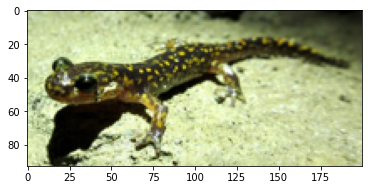

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("salamender.jpg")

width = 200
height = img.height * width // img.width
img = img.resize((width, height))

pixels = np.array(img).reshape(-1,3).astype(np.float32)

plt.imshow(img)
plt.show()

In [2]:
def kmeans(points, k):
  
  centroids = points[np.random.choice(len(points), k ,replace = False)]

  for iter in range(10):
    labels = np.full((points.shape[0]), 9)

    for pid, p in enumerate(points):
      min_dist = np.inf
      min_cid = -1

      for cid, c in enumerate(centroids):
        dist = ((p - c) ** 2).sum() ** 0.5

        if dist < min_dist:
          min_dist = dist
          min_cid = cid
      labels[pid] = min_cid

    new_centroids = np.zeros_like(centroids)
    counts = np.zeros(k, dtype = np.int32)

    for l, p in zip(labels, points):
      new_centroids[l] += p
      counts[l] += 1

    for i in range(k):
      new_centroids[i] /= counts[i]

    if np.array_equal(new_centroids, centroids):
      break
    else:
      centroids == new_centroids

    return labels, centroids

In [3]:
k = 3
points = [np.random.randn(k) for _ in range(20)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)

labels, centroids = kmeans(points, k)

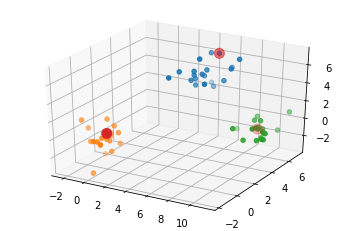

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

clusters = [[] for _ in range(k)]

for a, p in zip(points, labels):
  clusters[p].append(a)
for cluster in clusters:
  ax.scatter(*zip(*cluster))

ax.scatter(*zip(*centroids), s=100)
plt.show()

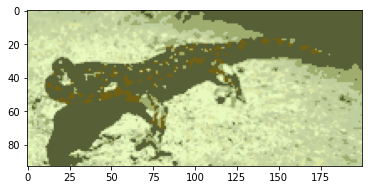

In [5]:
labels, centroids = kmeans(pixels, 10)

centroids = centroids.astype(np.int32)

for l, pid in zip(labels, range(pixels.shape[0])):
  pixels[pid] = centroids[l]

new_img = Image.fromarray(pixels.reshape((height, width, 3)).astype(np.int8), 'RGB')
plt.imshow(new_img)
plt.show()

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10)
kmeans.fit(pixels)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

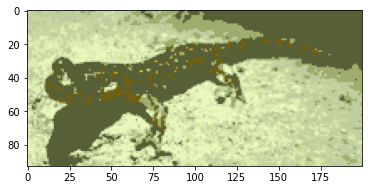

In [7]:
labels, centroids = kmeans.labels_, kmeans.cluster_centers_

for l, pid in zip(labels, range(pixels.shape[0])):
  pixels[pid] = centroids[l]

new_img = Image.fromarray(pixels.reshape((height, width, 3)).astype(np.int8), 'RGB')
plt.imshow(new_img)
plt.show()